In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
# Check basic statistics of dataset

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
# Check for missing values in the data

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
# check for unique values in data

df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [6]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [7]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [8]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [10]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array([0, 1])

In [13]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [14]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [16]:
df['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [17]:
# Replace 

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [18]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [19]:
df['Age'] = df['Age'].replace('0-17','youth')
df['Age'] = df['Age'].replace('18-25','teenage')
df['Age'] = df['Age'].replace('26-35','adult')
df['Age'] = df['Age'].replace('36-45','middle_age')
df['Age'] = df['Age'].replace('46-50','fifty')
df['Age'] = df['Age'].replace('51-55','fifty_plus')
df['Age'] = df['Age'].replace('55+','older')

In [20]:
df['Age'].unique()

array(['youth', 'older', 'adult', 'fifty', 'fifty_plus', 'middle_age',
       'teenage'], dtype=object)

In [31]:
df = df.replace({'F': 1,'M': 2})

In [32]:
df['Gender'].unique()

array([1, 2])

In [35]:
df = df.replace({'A': 1,'B': 2,'C': 3})

In [36]:
df['City_Category'].unique()

array([1, 3, 2])

In [37]:
# fill nan values

df = df.fillna(0)

In [38]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [39]:
# Data Visualisation

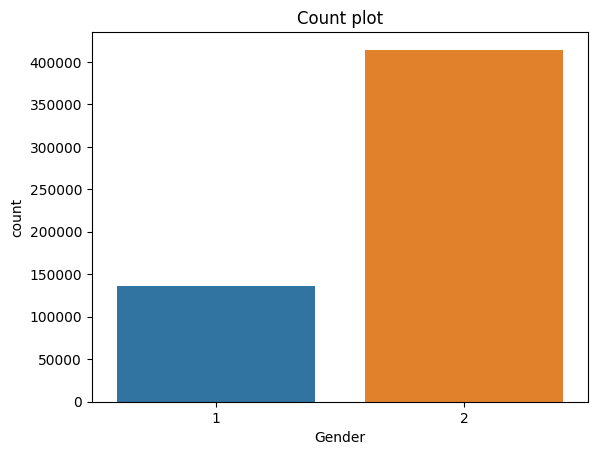

In [29]:
# visualize individul column

sns.countplot(x = 'Gender',data = df);
plt.title('Count plot');

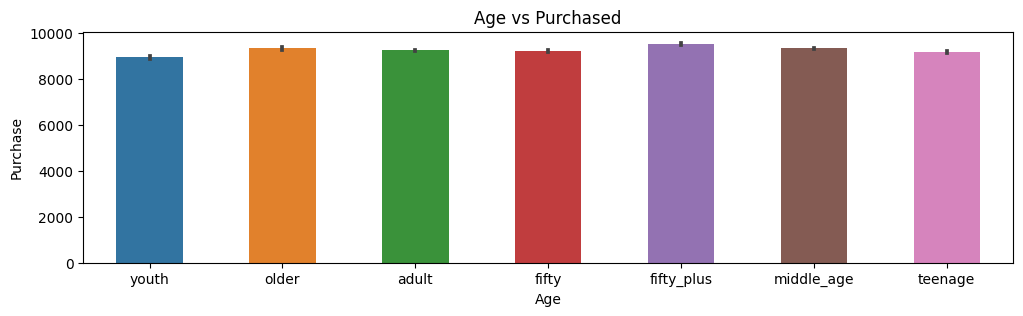

In [59]:
# Age vs Purchased

plt.figure(figsize = (12,3))
sns.barplot(x = 'Age',y = 'Purchase',data = df,width = 0.5)
plt.title('Age vs Purchased');

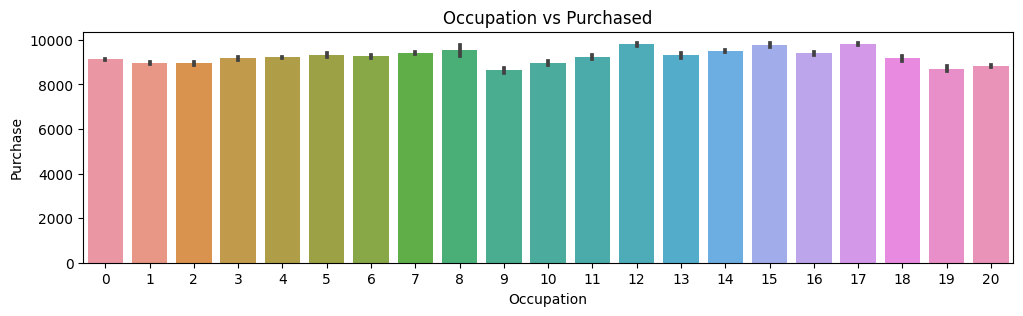

In [60]:
# Occupation vs Purchased

plt.figure(figsize=(12,3))
sns.barplot(x = 'Occupation', y = 'Purchase', data = df)
plt.title('Occupation vs Purchased');

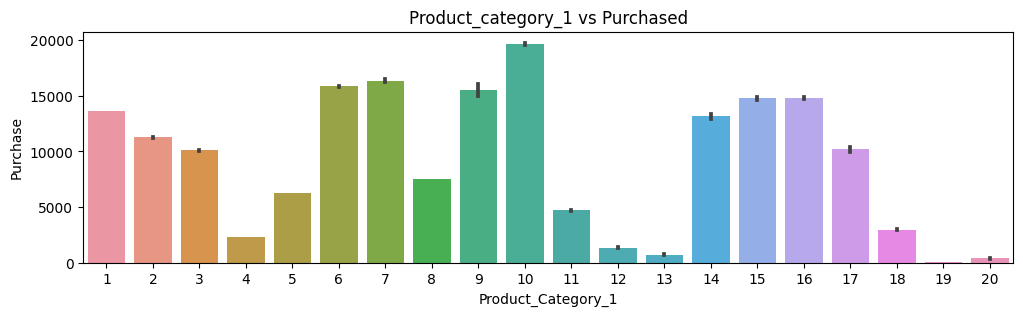

In [61]:
# Product_category_1 vs Purchased

plt.figure(figsize=(12,3))
sns.barplot(x = 'Product_Category_1' , y = 'Purchase', data = df)
plt.title('Product_category_1 vs Purchased');

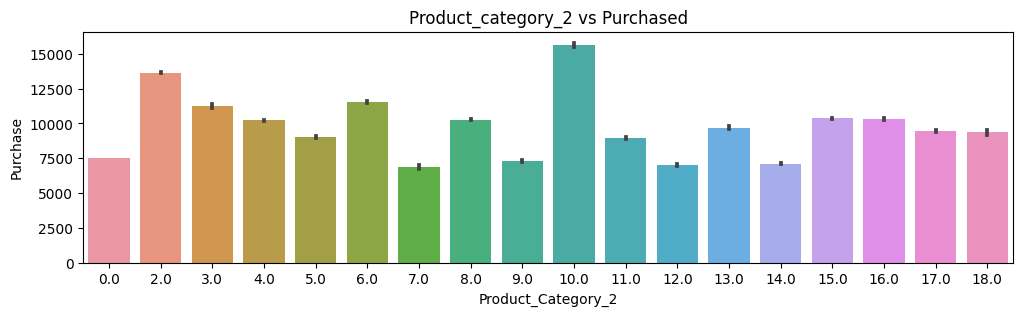

In [62]:
# Product_category_2 vs Purchased

plt.figure(figsize=(12,3))
sns.barplot(x = 'Product_Category_2' , y = 'Purchase', data = df)
plt.title('Product_category_2 vs Purchased');

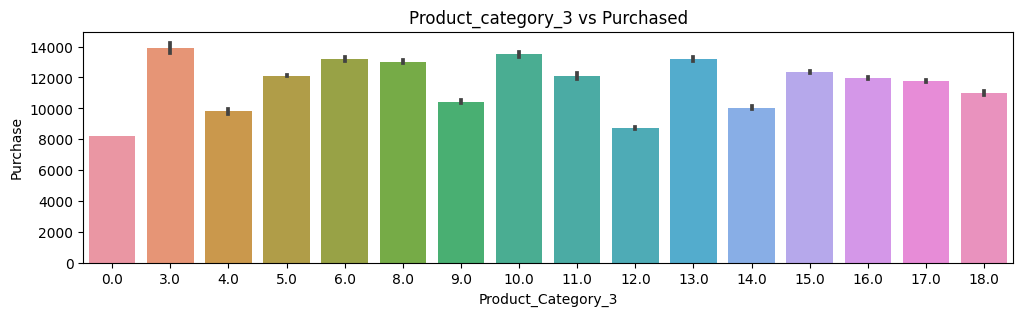

In [63]:
# Product_category_3 vs Purchased

plt.figure(figsize=(12,3))
sns.barplot(x = 'Product_Category_3' , y = 'Purchase', data = df)
plt.title('Product_category_3 vs Purchased');

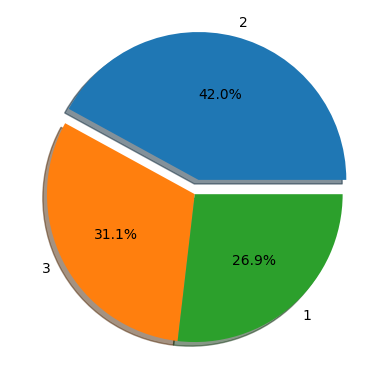

In [80]:
# City category pie chart

g = df['City_Category'].value_counts()
explodes = [0.1,0,0]
plt.pie(g, labels = g.index ,explode = explodes ,shadow = True ,autopct ='%1.1f%%');